<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/ml_python.png' width=600/></center>

<img src = "https://github.com/Jangrae/img/blob/master/iris2.png?raw=true" width=800 align="left"/>

# 실습 내용

- 머신러닝 모델링을 위한 코딩은 무조건 할 수 있어야 합니다.
- 코딩 내용을 자세히 알지 못해도 무작정 코딩을 진행해봅니다.
- Iris 데이터를 대상으로 모델링을 진행합니다.
- DecisionTree 알고리즘을 사용합니다.
- 다양한 방법으로 모델 성능을 평가합니다.

# 1.환경 준비

- 기본 **라이브러리**와 대상 **데이터**를 가져와 이후 과정을 준비합니다.

<img src = "https://github.com/Jangrae/img/blob/master/code_11.png?raw=true" width=700 align="left"/>

In [1]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format = 'retina'

In [28]:
# 데이터 읽어오기
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/iris.csv'
data = pd.read_csv(path)

# 2.데이터 이해

- 분석할 데이터를 **충분히 이해**할 수 있도록 다양한 **탐색** 과정을 수행합니다.

<img src = "https://github.com/Jangrae/img/blob/master/code_12.png?raw=true" width=700 align="left"/>

In [29]:
# 상위 몇 개 행 확인
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [30]:
# 하위 몇 개 행 확인
data.tail()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [31]:
# 변수 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [32]:
# 기술통계 확인
data.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [33]:
# 상관관계 확인
data.corr()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,1.000000,-0.117570,0.871754,0.817941
Sepal.Width,-0.117570,1.000000,-0.428440,-0.366126
Petal.Length,0.871754,-0.428440,1.000000,0.962865
Petal.Width,0.817941,-0.366126,0.962865,1.000000


# 3.데이터 준비

- **전처리** 과정을 통해 머신러닝 알고리즘에 사용할 수 있는 형태의 데이터를 준비합니다.

<img src = "https://github.com/Jangrae/img/blob/master/code_13.png?raw=true" width=700 align="left"/>

**1) x, y 분리**

- 우선 target 변수를 명확히 지정합니다.
- target을 제외한 나머지 변수들 데이터는 x로 선언합니다.
- target 변수 데이터는 y로 선언합니다. 
- 이 결과로 만들어진 x는 데이터프레임, y는 시리즈가 됩니다.
- 이후 모든 작업은 x, y를 대상으로 진행합니다.

In [34]:
# target 확인
target = 'Species'



# 1단계 : x,y 분리

# target 변수(컬럼) 확인

target = 'Species'

# 데이터 분리
x = data.drop(target, axis = 1)
y = data.loc[:, target]

# 2단계 학습용, 평가용 데이터 분리

from sklearn.model_selection import train_test_split

# 7:3으로 분리
x_train, x_test, y_train, y_test = train_test_split(x , y, 
                                                    test_size = 0.3,
                                                    shuffle = True, # 기본값 : 섞은 후 나눈 다
                                                    random_state=1,
                                                   stratify=y ) # 정수로 넣으면 건수, 실수로하면 퍼센트


In [ ]:
# # train_test_split() 함수 내의 매개변수 stratify

# 테스트 세트의 갯수가 훈련 세트에 비해 터무니 없이 작을 때 샘플링 편향이 발생할 수 있음

# 그것을 방지하기 위해 train_test_split()함수 내에 stratify 매개변수에 타깃 데이터(y)를 전달하면 클래스 비율에 맞게 데이터를 나누게 됨

# 쉽게 말하면 그냥 골고루 비율 맞춰서 데이터 잘 나눠주는 옵션이다 정도로 이해하시면 될것 같슴니댜

**2) 학습용, 평가용 데이터 분리**

- 학습용, 평가용 데이터를 적절한 비율로 분리합니다.
- 반복 실행 시 동일한 결과를 얻기 위해 random_state 옵션을 지정합니다.

In [35]:
# 모듈 불러오기


# 7:3으로 분리


# 4.모델링

- 본격적으로 모델을 **선언**하고 **학습**하고 **평가**하는 과정을 진행합니다.
- 우선 **회귀** 문제인지 **분류** 문제인지 명확히 구분합니다.

<img src = "https://github.com/Jangrae/img/blob/master/code_14.png?raw=true" width=700 align="left"/>

- 회귀 문제 인가요? 분류 문제인가요?
- 회귀인지 분류인지에 따라 사용할 알고리즘과 평가 방법이 달라집니다.
- 우선 다음 알고리즘을 사용합니다.
    - 알고리즘: DecisionTreeClassifier

In [36]:
# 1단계: 불러오기
x
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


In [37]:
x
# 2단계: 선언하기 !         괄호를 반드시 넣어라.
model = DecisionTreeClassifier(max_depth = 3) # 몇 단계 까지 뿌리를 내릴까요? 과대적합 없애기 위해? 

# 3단계: 학습하기
model.fit(x_train, y_train)

# 4단계: 예측하기
y_pred = model.predict(x_test)

# 실제값과 예측값 비교
print(y_test.values[:10]) #시리즈 --> 배열 
print(y_pred[:10]) #배열

# 5단계: 평가하기
accuracy_score(y_test, y_pred) 


['virginica' 'setosa' 'setosa' 'virginica' 'versicolor' 'versicolor'
 'virginica' 'versicolor' 'virginica' 'setosa']
['virginica' 'setosa' 'setosa' 'versicolor' 'versicolor' 'versicolor'
 'virginica' 'versicolor' 'virginica' 'setosa']


0.9777777777777777

# 5.분류 성능 평가

- 다양한 성능 지표로 분류 모델 성능을 평가합니다.

**1) Confusion Matrix**

In [38]:
# 모듈 불러오기

from sklearn.metrics import confusion_matrix
# 성능 평가
print(confusion_matrix(y_test,y_pred))



[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]


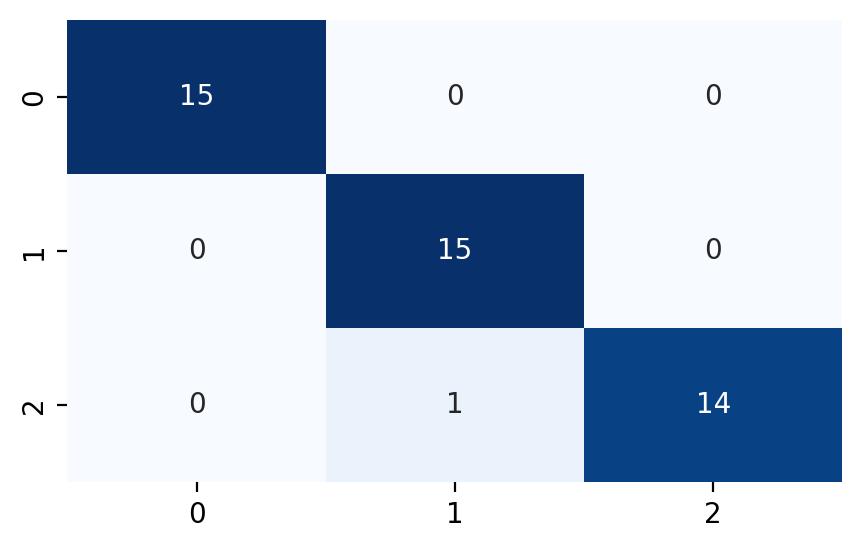

In [39]:
# 혼동행렬 시각화
plt.figure(figsize=(5,3))
sns.heatmap(confusion_matrix(y_test,y_pred),
           annot = True,
           cbar = False,
           cmap = 'Blues',
           annot_kws={'size':10})
plt.show()

# e-1 --> 0.1 , 1/10
# e-2 --> 0.1 , 1/100
# e-2 --> 100
# 1.2e+02 --> 1.2 ** 10 --> 120



**2) Accuracy**

In [40]:
# 모듈 불러오기
from sklearn.metrics import accuracy_score
# 성능 평가
print(accuracy_score(y_test,y_pred))

0.9777777777777777


**3) Precision**

In [41]:
# 모듈 불러오기


# 성능 평가
# 모듈 불러오기
from sklearn.metrics import precision_score


# 성능 평가
# print(precision_score(y_test,y_pred, average='binary')) # 디폴트값 위랑 같음

print(precision_score(y_test,y_pred, average=None)) # 디폴트값인 binary는 멀티플값으로 나타내지 못해서

# print(precision_score(y_test,y_pred, average='macro')) # 
# print(precision_score(y_test,y_pred, average='weighted')) # 가중평균


[1.     0.9375 1.    ]


**4) Recall**

In [42]:
# 모듈 불러오기
from sklearn.metrics import recall_score

# 성능 평가
print(recall_score(y_test,y_pred,average=None))

[1.         1.         0.93333333]


**5) F1-Score**

In [43]:
# 모듈 불러오기

# 모듈 불러오기
from sklearn.metrics import f1_score


# 성능 평가
print(f1_score(y_test,y_pred,average=None))# 성능 평가


[1.         0.96774194 0.96551724]


**6) Classification Report**

In [44]:
# 모듈 불러오기


# 성능 평가
# 모듈 불러오기
from sklearn.metrics import classification_report

# 성능 평가
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.94      1.00      0.97        15
   virginica       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [45]:
# precision_score 함수의 average 매개변수는 multiclass classification 문제에서만 사용 가능한 값들만 사용 가능합니다. 오류 메시지에서도 알 수 있듯이 'binary' 값은 multiclass 문제에서는 사용할 수 없습니다. 따라서 다른 값을 사용하셔야 합니다. 'micro', 'macro', 'weighted' 등이 사용 가능합니다.

# 기본적으로 파라미터 average는 binary, 즉 이진 분류로 default가 되어 있기 때문에 파라미터 값을 따로 설정해주어야 합니다. 사용될 수 있는 파라미터 값은 다음과 같습니다.
# - micro : 각각의 TP, FN, FP, TN 값들을 모두 합친 Total TP, FN, FP, TN 값들을 이용해 계산
# - macro : 각각의 클래스에 따라 TP, FN, FP, TN 값들을 이용해서 평가지표를 계산한 후 그 값들의 평균을 사용
# - weighted : 각 클래스에 해당하는 data 개수에 가중치를 주어 평균을 구하는 것
# 어떤 옵션을 선택할 지는 문제의 특성에 따라 다르며, 가장 적합한 옵션을 선택해야 합니다.

# 제가 precision_score 함수 에러 난 거 
# 1대1 문의 해주신 겁니다 
# 공익을 위해 올립니다 ^^7